# Exploring Ford GoBike System Data (spring 2020)
## by Ahmed Tryaq

## Preliminary Wrangling

This data set includes details about individual rides made in a bike-sharing system covering the greater San Francisco Bay area during the period from April to June (spring 2020).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Loading and Exploring dataset:

In [2]:
dataframes = []
datasets = [4,5,6]

for data in datasets:
    dataframes.append(pd.read_csv('20200' + str(data) + '-baywheels-tripdata.csv'))

In [3]:
spring = pd.concat(dataframes)
spring.reset_index(inplace=True, drop=True)
spring.shape

(380678, 14)

In [4]:
spring.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
0,5A1FF31692371859,electric_bike,2020-04-04 08:28:20,2020-04-04 08:33:34,NaN,NaN,NaN,NaN,37.7692,-122.4209,37.7703,-122.4069,casual,NaN
1,D8D5BA2D4F051133,electric_bike,2020-04-03 18:55:43,2020-04-03 19:21:05,NaN,NaN,NaN,NaN,37.8023,-122.4244,37.8023,-122.4244,casual,NaN
2,A3633A9140CA4FF8,electric_bike,2020-04-04 15:11:04,2020-04-04 15:12:21,NaN,NaN,NaN,NaN,37.7667,-122.3961,37.7667,-122.3962,casual,NaN
3,301F57EB0197A5E0,electric_bike,2020-04-03 20:21:03,2020-04-03 22:08:06,8th St at Ringold St,60.0,NaN,NaN,37.7744,-122.4095,37.7805,-122.4033,casual,NaN
4,9429C701AF5744B3,electric_bike,2020-04-03 18:39:39,2020-04-03 18:47:19,NaN,NaN,NaN,NaN,37.8027,-122.4433,37.8009,-122.4269,casual,NaN


Converting date columns to datetime

In [5]:
spring['started_at'] = pd.to_datetime(spring['started_at'])
spring['ended_at'] = pd.to_datetime(spring['ended_at'])

In [6]:
spring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380678 entries, 0 to 380677
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             380678 non-null  object        
 1   rideable_type       380678 non-null  object        
 2   started_at          380678 non-null  datetime64[ns]
 3   ended_at            380678 non-null  datetime64[ns]
 4   start_station_name  239969 non-null  object        
 5   start_station_id    239969 non-null  float64       
 6   end_station_name    233788 non-null  object        
 7   end_station_id      233788 non-null  float64       
 8   start_lat           380678 non-null  float64       
 9   start_lng           380678 non-null  float64       
 10  end_lat             380036 non-null  float64       
 11  end_lng             380036 non-null  float64       
 12  member_casual       380678 non-null  object        
 13  is_equity           138251 no

**Making a column of duration of each ride**

In [7]:
spring['duration'] = spring['ended_at'] - spring['started_at']
spring.duration.describe()

count                    380678
mean     0 days 00:29:21.336097
std      0 days 06:24:48.194616
min           -1 days +23:45:57
25%             0 days 00:07:14
50%             0 days 00:13:24
75%             0 days 00:24:58
max            38 days 00:08:52
Name: duration, dtype: object

Dropping error columns with duration less than zero.

In [8]:
index = (spring[spring.duration < '0']).index
spring.drop(index, inplace=True)

In [9]:
spring.shape

(380365, 15)

In [10]:
spring.rideable_type.value_counts()

electric_bike    261134
docked_bike      119231
Name: rideable_type, dtype: int64

Checking for duplicates:

In [11]:
spring.duplicated().mean()

0.0

### Structure of your dataset

380365 Rows and 15 columns

### Main features of interest in dataset

Date, customer type (member or casual), rideable type, start station, end station.

### Features in the dataset may help support our investigation

Duration of the trip, start time, customer type (member or casual), rideable type.

## Univariate Exploration

## Duration

In [12]:
#Converting duration to minutes
spring['duration'] = spring.duration.dt.total_seconds() / 60

Plotting boxplot and histogram of duration:

(-2.0, 1000.0)

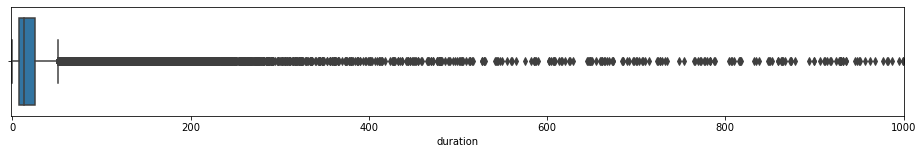

In [13]:
plt.figure(figsize=(16,2))
sb.boxplot(data=spring, x='duration')
plt.xlim(-2,1000)

The previous boxplor shows that the distribution of duration is highly right skewd, with many outliars, they don't seem to be errors so we are gonna keep them. Log scale histogram is an appropriate option for visualization.

Plotting duration distribution:

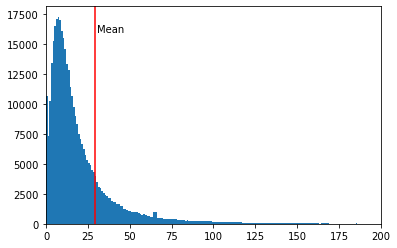

In [64]:
bins = np.arange(0, spring.duration.max() + 1, 1)
plt.hist(spring.duration, bins = bins)
plt.xlim(0, 200)
plt.axvline(spring.duration.mean(), color='r')
plt.text(30.2,16000,'Mean');

As concluded earlier, data is right skewed.

plotting log scaled distribution histogram:

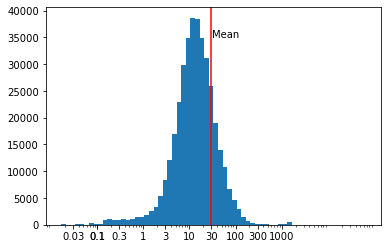

In [62]:
max_duration = np.log10(spring.duration.max())
min_duration = np.log10(1/60)
bins = 10 ** np.arange(min_duration, max_duration + 0.1, .1)

plt.hist(spring.duration, bins=bins)
plt.xscale('log')
tick = [0.1, .03, .1, .3, 1, 3, 10, 30, 100, 300, 1000]
plt.xticks(tick, tick)
plt.axvline(spring.duration.mean(), color='r')
plt.text(30.2,35000,'Mean');

Although the plot shows that most of individuals tend to use a bike for about 10 mins, mean values is skewed to the right due to very high values.

Comparing number of casual customers to number of members:

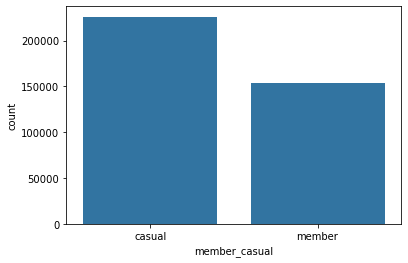

In [16]:
color = sb.color_palette()[0]
sb.countplot(spring['member_casual'], color=color)

Plot shows significant visual increase of casual customers compared to members.

Plotting number of trips on elctric bikes compared with docked bikes:

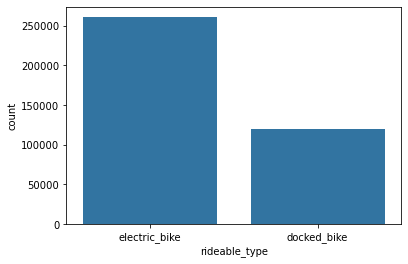

In [17]:
sb.countplot(spring['rideable_type'], color=color)

It appears the most of trips done in spring 2020 was on an electric bikes.

### Summary I

- Trip duration looked clearly right skewed, I decided to make a log transformation for visualization, most trips took only 10 minutes, while there are few points with a much larger durations. <br>
- Most of customers were casual customers, and most of bikes rided were electric bikes. <br>

## Bivariate Exploration

- In this section, I'm investigating relationships between different pairs of variables in the data.
Starting with mean duration in each category.

Comparing mean trip duration for casual customers and members

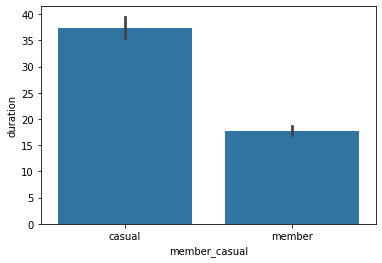

In [18]:
sb.barplot(data=spring, x='member_casual', y='duration', color=color)

Trip duration in casual customers is nearly twice as members.

Also comparing trip duration through different bike types:

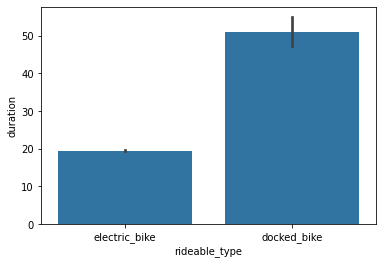

In [19]:
sb.barplot(data=spring, x='rideable_type', y='duration', color=color);

Plot shows clearly that customers who used **docked bikes** took more time to reach their destination compared with electric bikes.

In the next plot, I'm comparing total bike rides for each week.

In [20]:
indexed_df = spring.set_index('started_at')
total_per_week = indexed_df.resample('W').ride_id.count()

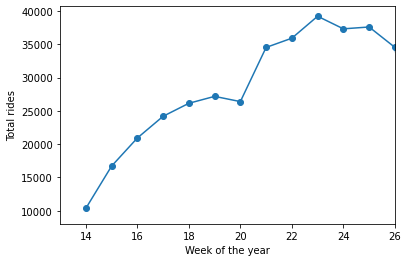

In [49]:
plt.plot(total_per_week.index.weekofyear, total_per_week, 'o', linestyle='-')
plt.xlim(13,26)
plt.xlabel('Week of the year')
plt.ylabel('Total rides');

Total rides count is increasing over time.

Plotting mean duration of trip weekly.

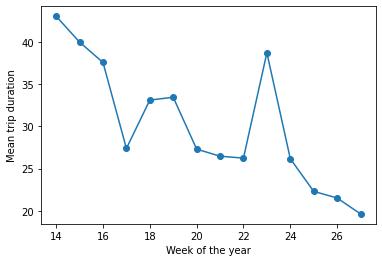

In [50]:
duration_per_week = indexed_df.resample('W').duration.mean()
plt.plot(duration_per_week.index.weekofyear, duration_per_week, 'o', linestyle='-')
plt.xlabel('Week of the year')
plt.ylabel('Mean trip duration');

Although total rides seem to increase with time, trip duration mean is decreasing, in the following section I'm plotting relationship between total ride count every week and mean trip duration.

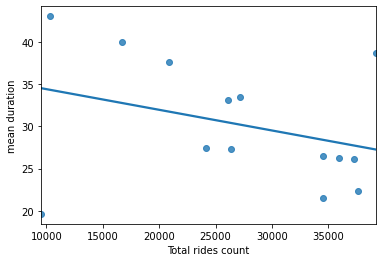

In [74]:
sb.regplot(total_per_week, duration_per_week, ci=None)
plt.xlabel('Total rides count')
plt.ylabel('mean duration');

Visually, there is a negative correlation between number of rides per week and mean ride duration, however, further analysis is required for asessing this relationship.

### Summary II

- Visualization showed that Casual customers have trip duration larger then members.
- Electric bikes are related with much lower trip duration compared with docked bikes.

### Other features

- Total rides per week is increasing in our range of analysis, while mean trip duration seems to be decreasing.
- Scatter plot suggests negative relationship between total rides per week and mean trip duration.

## Multivariate Exploration

As shown before, **docked bikes** and **casual customers** are the most related factors with high trip duration, further analysis of each category is conducted in the following plot. <br>
Checking every set of categories in detail is a good practice to avoid wrong conclusions such as those resulting from **Simpson's paradox** for example.

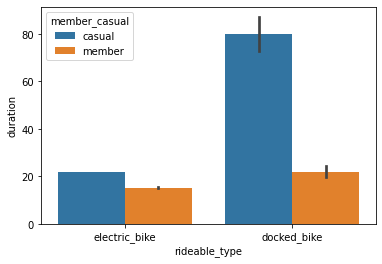

In [52]:
sb.barplot(data=spring, x='rideable_type', y='duration', hue='member_casual');

Visually, it looks that **casual customers** who used **docked bikes** have the heighst chances for having a very **long** trip. While **members** who used **electric bikes** are related with the **least trip duration**.

Let us plot the change of mean trip duration over time for each customer category.

In [33]:
# Subsetting each category from the original dataframe
casuals = indexed_df[indexed_df.member_casual == 'casual']
members = indexed_df[indexed_df.member_casual == 'member']

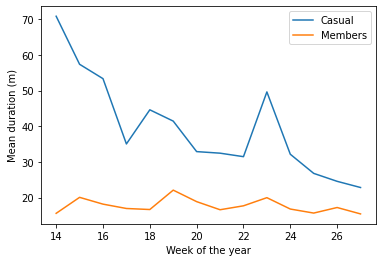

In [69]:
#Summarizing dataframe in weeks
casuals_dur = casuals.resample('W').duration.mean()
members_dur = members.resample('W').duration.mean()

#plotting
plt.plot(casuals_dur.index.weekofyear, casuals_dur, label='Casual')
plt.plot(members_dur.index.weekofyear, members_dur, label='Members')
plt.legend()
plt.xlabel('Week of the year')
plt.ylabel('Mean duration (m)');

While members trip duration average looks constant over time, trip duration avg is falling significantly over time in casual individuals. <br>

Next we are having a look over change of total rides over time in each category.

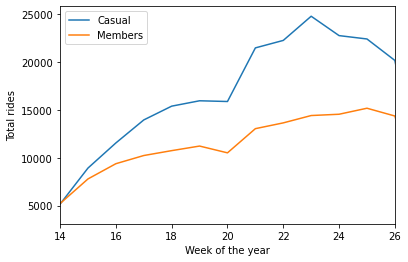

In [70]:
#Summarizing dataframe in weeks
casuals_rids = casuals.resample('W').ride_id.count()
members_rids = members.resample('W').ride_id.count()

#plotting both lines
plt.plot(casuals_rids.index.weekofyear, casuals_rids, label='Casual')
plt.plot(members_rids.index.weekofyear, members_rids, label='Members')
plt.legend()
plt.xlim(14,26)
plt.xlabel('Week of the year')
plt.ylabel('Total rides');

As shown before, total rides are increasing over spring period in both categories.

### Summary III

As total rides increase over time in both categories, mean ride duration looks to decrease over time only in casual customers. Mean duration doesn't show significant visual change over time.

### Interesting interaction:

As **members** total rides seem to be relatively constant over time, making another *scatter plot* of relation between **total rides** and **ride duration** in **casuals only** may be an interesting idea.

Text(0, 0.5, 'mean duration')

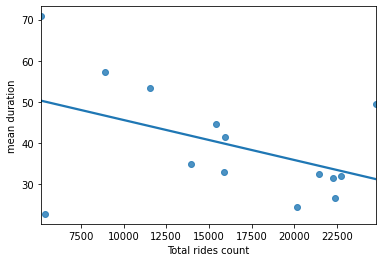

In [73]:
sb.regplot(casuals_rids, casuals_dur, ci=None)
plt.xlabel('Total rides count')
plt.ylabel('mean duration')

Negative correlation between **total rides** and **mean duration** in **casual customers** is visually stronger. <br> Further statistical analysis is required to assess the nature of this relationship.